<img src="./pics/DL.png" width=110 align="left" style="margin-right: 10px">

# Introduction to Deep Learning

## 10. Home Assignment II.

---

## B) Fashion MNIST

<img src="./pics/exercises/fashion.gif" width=400>

Build a convolutional network to classify the fashion mnist dataset. Build a function which will predict the class for an image. The function will get a path of an image as a parameter, it reads the image then returns the predicted class. You can assume that the path will always contain an image, which has *28 x 28 x 4* dimensions.

The dataset is available in [keras](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles). An example image is available at `data/fashion/test.png`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam, RMSprop

from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dense, Activation, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

from numpy.random import seed

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# set random seeds for reproducibility
tf.random.set_seed(42)
seed(42)

In [3]:
# download dataset and rescale to 0-1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.   

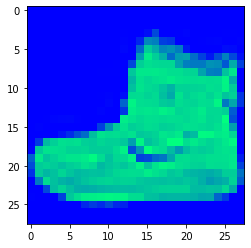

In [5]:
# sample image
plt.imshow(x_train[0], cmap=plt.get_cmap('winter'))

In [6]:
input_shape = (28, 28, 1)

print(y_train.shape)
print(input_shape)

(60000,)
(28, 28, 1)


In [7]:
# Initialize model
output_dim = 10

inp = Input(shape=input_shape)
queue = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inp)
queue = Conv2D(filters=64, kernel_size=(4, 4), activation='relu')(queue)
queue = MaxPool2D(pool_size=(2, 2))(queue)
queue = Dropout(0.3)(queue)
queue = Flatten()(queue)
queue = Dense(units=128, activation='relu')(queue)
queue = Dropout(0.2)(queue)
queue = Dense(units=output_dim, activation='softmax')(queue)
model = Model(inputs=inp, outputs=queue)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        32832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               991360

In [8]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=80,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10,
                                             verbose=1, mode='min')])

Epoch 1/80
480/480 [==============================] - 132s 275ms/step - loss: 0.4879 - accuracy: 0.8227 - val_loss: 0.3411 - val_accuracy: 0.8773
Epoch 2/80
480/480 [==============================] - 129s 270ms/step - loss: 0.3207 - accuracy: 0.8831 - val_loss: 0.2826 - val_accuracy: 0.8955
Epoch 3/80
480/480 [==============================] - 132s 275ms/step - loss: 0.2695 - accuracy: 0.8999 - val_loss: 0.2529 - val_accuracy: 0.9061
Epoch 4/80
480/480 [==============================] - 132s 275ms/step - loss: 0.2357 - accuracy: 0.9128 - val_loss: 0.2495 - val_accuracy: 0.9098
Epoch 5/80
480/480 [==============================] - 141s 294ms/step - loss: 0.2107 - accuracy: 0.9206 - val_loss: 0.2279 - val_accuracy: 0.9178
Epoch 6/80
480/480 [==============================] - 126s 262ms/step - loss: 0.1857 - accuracy: 0.9308 - val_loss: 0.2216 - val_accuracy: 0.9197
Epoch 7/80
480/480 [==============================] - 128s 267ms/step - loss: 0.1704 - accuracy: 0.9355 - val_loss: 0.2250 -

In [10]:
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print(f'The model final accuracy on test set is {final_accuracy:.2%}')

313/313 [==============================] - 6s 20ms/step - loss: 0.2923 - accuracy: 0.9204
The model final accuracy on test set is 92.04%


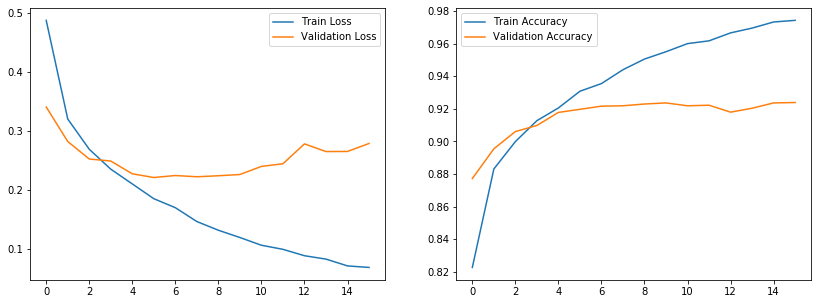

In [11]:
# visualize execution
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.legend()

In [12]:
# serialize model to JSON
model_json = model.to_json()
with open("mnist_fashion_cnn.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("mnist_fashion_cnn.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
# Pre-trained model
classes = np.unique(y_train)
num_classes = len(classes)
num_classes

10

In [14]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
train_X=np.dstack([x_train] * 3)
test_X=np.dstack([x_test] * 3)
train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape,test_X.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [16]:
# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])
train_X.shape, test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [18]:
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

In [19]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
                                                           train_Y_one_hot,
                                                           test_size=0.2,
                                                           random_state=42
                                                           )

In [20]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [21]:
# Define parameters for VGG16
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

In [23]:
# Preprocessing the input 
from keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input

train_X = preprocess_input(train_X)
valid_X = preprocess_input(valid_X)
test_X  = preprocess_input (test_X)

In [24]:
# Create base model of VGG16
import urllib.request
urllib.request.urlretrieve("https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5", "vgg16_model.h5")

('vgg16_model.h5', <http.client.HTTPMessage at 0x1413ce050>)

In [25]:
conv_base = VGG16(weights='vgg16_model.h5',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [26]:
# Extracting features
train_features = conv_base.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

12000/12000 [==============================] - 183s 15ms/step


In [28]:
# Saving the features
np.savez("train_features", train_features, train_label)
np.savez("test_features", test_features, y_test)
np.savez("val_features", val_features, valid_label)

In [29]:
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (10000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [30]:
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [67]:
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU

In [68]:
# Densely connected classifier, leakyrelu layer and a dense layer for the output classes
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(num_classes, activation='softmax'))

In [69]:
# Compile the mode
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.25),
    metrics=['acc'])

In [70]:
# Reduced learning and early stopping callbacks
reduce_learning = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=8,
    verbose=1,
    mode='auto')

callbacks_used = [reduce_learning, eary_stopping]

In [71]:
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 250

history = model.fit(
    train_features_flat,
    train_label,
    epochs=NB_EPOCHS,
    validation_data=(val_features_flat, valid_label),
    callbacks=callbacks_used
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 10s 217us/step - loss: 3.7599 - acc: 0.0998 - val_loss: 2.3286 - val_acc: 0.1015
Epoch 2/250
48000/48000 [==============================] - 10s 199us/step - loss: 2.3313 - acc: 0.1018 - val_loss: 2.3428 - val_acc: 0.1016
Epoch 3/250
48000/48000 [==============================] - 11s 230us/step - loss: 2.3350 - acc: 0.0986 - val_loss: 2.3160 - val_acc: 0.0997
Epoch 4/250
48000/48000 [==============================] - 13s 261us/step - loss: 2.3366 - acc: 0.0993 - val_loss: 2.3393 - val_acc: 0.0987
Epoch 5/250
48000/48000 [==============================] - 11s 226us/step - loss: 2.3321 - acc: 0.0979 - val_loss: 2.3231 - val_acc: 0.1009
Epoch 6/250
48000/48000 [==============================] - 10s 201us/step - loss: 2.3336 - acc: 0.0984 - val_loss: 2.3578 - val_acc: 0.1002
Epoch 7/250
48000/48000 [==============================] - 10s 205us/step - loss: 2.3344 - acc: 0.1011 - val_l

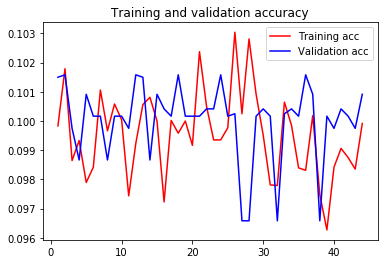

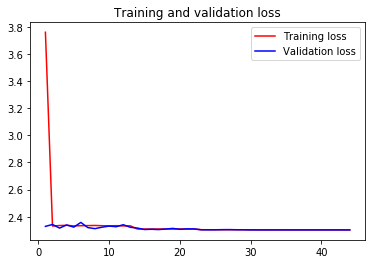

In [72]:
# plot the loss and accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [73]:
# serialize model to JSON
model_json = model.to_json()
with open("vgg16_cnn.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("vgg16_cnn.h5")
print("Saved model to disk")

Saved model to disk
